<a href="https://colab.research.google.com/github/CrissRMFI/TA047R-2C2024-GRUPO08/blob/main/TA047R_TP2_GRUPO08_ENTREGA_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spacy

In [ ]:
import pandas as pd
import nltk
from nltk import sent_tokenize
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
sns.set(style="whitegrid")

In [ ]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Pre - Procesamiento

### Separo los datos en variables de entrada y etiquetas

In [ ]:
X_train_title = train_set['title']
X_train_description = train_set['description']
X_train_project = train_set['project']
Y_train_point = train_set['storypoint']

In [ ]:
label_encoder = LabelEncoder()
train_set['project-encoder'] = label_encoder.fit_transform(train_set['project']).reshape(-1, 1)
test_set['project-encoder'] = label_encoder.fit_transform(test_set['project']).reshape(-1, 1)

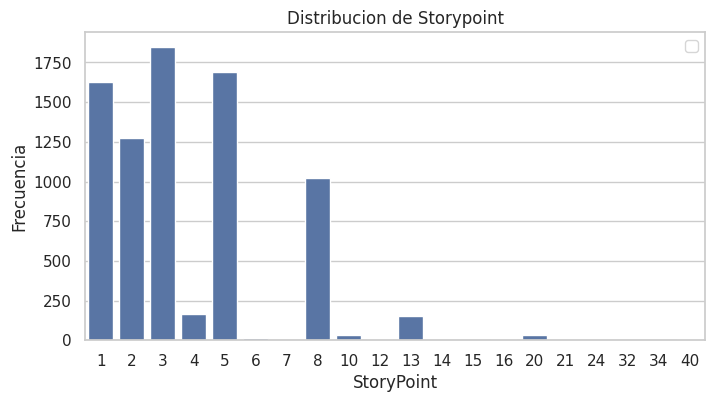

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=train_set,x='storypoint')
plt.xlabel('StoryPoint')
plt.ylabel('Frecuencia')
plt.title('Distribucion de Storypoint')
plt.legend()
plt.show()

### Mostramos un sample de algunas descripciones, titulos y storypoint

In [ ]:
sample_train = train_set.sample(n=10)

for _, row in sample_train.iterrows():
    print("\033[1m"+"Título:\n"+"\033[0m", row["title"])
    print("\033[1m"+"Descripción:\n"+"\033[0m", row["description"])
    print("\033[1m"+ "Storypoint: " , row["storypoint"] )
    print("\n" + "-"*30 + "\n")


Título:
 PersistentVolumeTest.BadACLNoPrincipal is flaky
Descripción:
 https://builds.apache.org/job/Mesos/1457/COMPILER=gcc,CONFIGURATION=--verbose%20--enable-libevent%20--enable-ssl,OS=centos:7,label_exp=docker%7C%7CHadoop/consoleFull    {noformat}  [ RUN      ] PersistentVolumeTest.BadACLNoPrincipal  I0108 01:13:16.117883  1325 leveldb.cpp:174] Opened db in 2.614722ms  I0108 01:13:16.118650  1325 leveldb.cpp:181] Compacted db in 706567ns  I0108 01:13:16.118702  1325 leveldb.cpp:196] Created db iterator in 24489ns  I0108 01:13:16.118723  1325 leveldb.cpp:202] Seeked to beginning of db in 2436ns  I0108 01:13:16.118738  1325 leveldb.cpp:271] Iterated through 0 keys in the db in 397ns  I0108 01:13:16.118793  1325 replica.cpp:779] Replica recovered with log positions 0 -> 0 with 1 holes and 0 unlearned  I0108 01:13:16.119627  1348 recover.cpp:447] Starting replica recovery  I0108 01:13:16.120352  1348 recover.cpp:473] Replica is in EMPTY status  I0108 01:13:16.121750  1357 replica.cpp:67

### Eliminamos nombres de rutas y librerias

In [ ]:
import re

def clean_description(description):
    # Eliminar rutas de archivos y librerías
    description = re.sub(r'(/[\w./-]+)|([a-zA-Z]:\\[\w.\\-]+)', ' ', description)
    # Eliminar URLs
    description = re.sub(r'http[s]?://\S+', ' ', description)
    # Eliminar líneas de código (sencillas)
    description = re.sub(r'^\s*\$.*$', ' ', description, flags=re.MULTILINE)
    description = re.sub(r'^\s*#.*$', ' ', description, flags=re.MULTILINE)
    description = re.sub(r'`[^`]+`', ' ', description)
    # Eliminar caracteres especiales
    description = re.sub(r'[^a-zA-Z0-9\s]', ' ', description)  # Mantener solo letras, números y espacios
    # Opcional: Eliminar múltiples espacios en blanco
    description = re.sub(r'\s+', ' ', description).strip()  # Reemplazar múltiples espacios con uno solo y eliminar espacios al inicio y fin
    return description


In [ ]:
train_set['description'] = train_set['description'].map(lambda x: clean_description(x))
train_set['title'] = train_set['title'].map(lambda x: clean_description(x))
test_set['description'] = test_set['description'].map(lambda x: clean_description(x))
test_set['title'] = test_set['title'].map(lambda x: clean_description(x))

## Tokenizamaos por palabras

## Tokenizacion - NLTK - Stop Words

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
model_word_tokenize = train_set.copy(deep=True)
tokens_title = model_word_tokenize['title'].map(lambda x: tokenize_and_remove_stopwords(x))
tokens_description = model_word_tokenize['description'].map(lambda x: tokenize_and_remove_stopwords(x))
mean_len_token_title = model_word_tokenize['title'].map(lambda x: np.mean([len(token) for token in tokenize_and_remove_stopwords(x)]))
mean_len_token_description = model_word_tokenize['description'].map(lambda x: np.mean([len(token) for token in tokenize_and_remove_stopwords(x)]))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
sample_df = model_word_tokenize.sample(10)

for _, row in sample_df.iterrows():
    print("\033[1m" + "Título:\n", row["title"])
    print("Descripción:\n", row["description"])
    print( "Storypoint: ", row["storypoint"])
    print("\n" + "-"*30 + "\n")

Título:
 http does not report failure to bind to port
Descripción:
 Stumbled upon this while having Hadoop daemons running but simple way to repoduce noformat nc lp 9000 stream create foo definition http log deploy all seems ok http post data hello Error 500 rightfully so noformat
Storypoint:  3

------------------------------

Título:
 Karaf Cellar in TESB
Descripción:
 As a pre sales colleague I want to be able to demonstrate the clustering capabilities of the Talend Runtime Provide Karaf Cellar feature latest version 2 2 2 in the Talend Runtime Features URL shall be known but feature or features shall not be installed by default Bundles and features are available in Maven Central
Storypoint:  1

------------------------------

Título:
 Add a name field into NetworkInfo
Descripción:
 This allows the framework writer to specify the name of the network they want their container to join Why not using groups That s because there might be multiple groups under a single network e g admin v

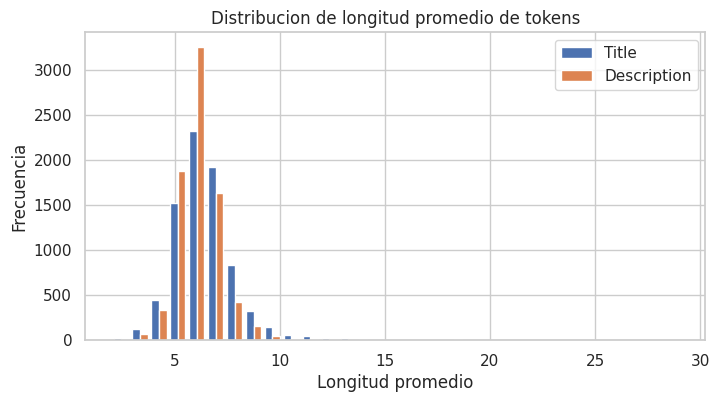

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.hist([mean_len_token_title, mean_len_token_description], bins=30, label=['Title', 'Description'])
plt.xlabel('Longitud promedio')
plt.ylabel('Frecuencia')
plt.title('Distribucion de longitud promedio de tokens')
plt.legend()
plt.show()

### Vectorizamos aplicando la técnica de TF-IDF y Bag Of Words

In [ ]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
nlp = spacy.load("en_core_web_sm")

In [ ]:
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])

In [ ]:
def procesar_tfidf(data_set, train=True, vectorizer=None):

    data_set['title_description_lemmatized'] = (data_set['title'] + ' ' + data_set['description']).apply(lemmatize_text)


    if train:
        vectorizer = TfidfVectorizer()
        title_description_vec = vectorizer.fit_transform(data_set['title_description_lemmatized'])
    else:
        title_description_vec = vectorizer.transform(data_set['title_description_lemmatized'])


    project_encoder = data_set['project-encoder'].values.reshape(-1, 1)
    vec_tfidf = np.hstack((title_description_vec.toarray(), project_encoder))
    data_set['tfidf'] = list(vec_tfidf)

    return data_set, vectorizer


In [ ]:
def procesar_bow(data_set, train=True, vectorizer=None):

    data_set['title_description_lemmatized'] = (data_set['title'] + ' ' + data_set['description']).apply(lemmatize_text)


    if vectorizer is None:
        vectorizer = CountVectorizer(stop_words='english')

    if train:
        title_description_vec = vectorizer.fit_transform(data_set['title_description_lemmatized'])
    else:
        title_description_vec = vectorizer.transform(data_set['title_description_lemmatized'])


    project_encoder = data_set['project-encoder'].values.reshape(-1, 1)
    vec_bow = np.hstack((title_description_vec.toarray(), project_encoder))


    data_set['bow'] = list(vec_bow)

    return data_set, vectorizer


# XG Boost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
train_set, vectorizer = procesar_bow(train_set, train=True)
test_set, _ = procesar_bow(test_set, train=False, vectorizer=vectorizer)

In [ ]:
X_train = train_set['bow'].tolist()
y_train = train_set['storypoint']
X_test = test_set['bow'].tolist()

model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, learning_rate=0.1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

output = test_set[['id']].copy()
output['storypoint'] = y_pred

output.to_csv('bow_pred.csv', index=False)


In [ ]:
output = test_set[['id']].copy()
output['storypoint'] = y_pred.round()

output.to_csv('bow_pred_round.csv', index=False)


In [ ]:
import pickle

model_pkl_file = "XGBoost-BOW.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)